## 1b: write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out. 


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('./spam_dataset.csv')


df = pd.DataFrame(data)

# Split data into features and target
X = df[['word1', 'word2', 'word3', 'word4']]
y = df['spam']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_predictions)*100:.2f}%")

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions)*100:.2f}%")


Naive Bayes Accuracy: 46.67%
KNN Accuracy: 40.00%


## 2b. Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth) 

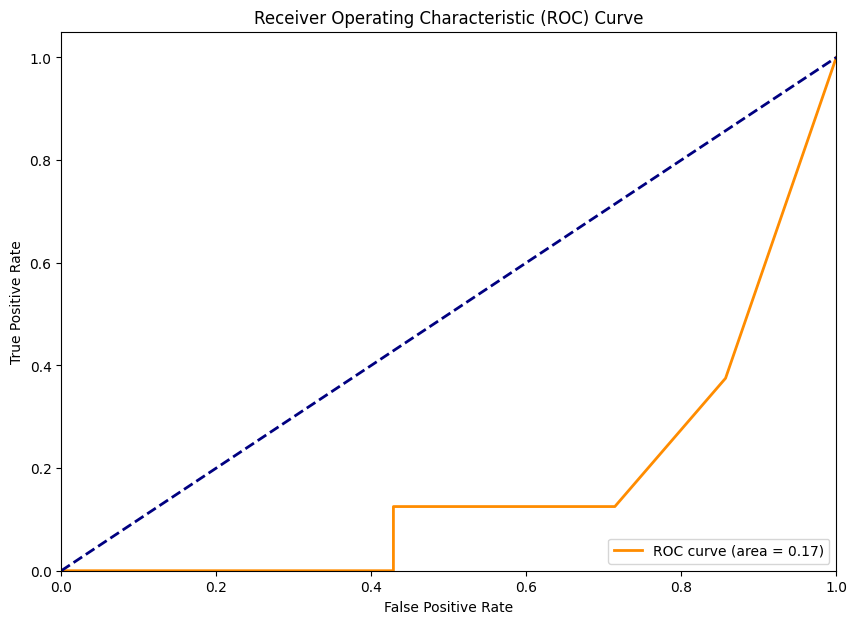

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Reading data
# Assuming spam_dataset.csv has the same structure as the sample data
data = pd.read_csv('./spam_dataset.csv')

# Splitting data into features and target
X = data[['word1', 'word2', 'word3', 'word4']]
y = data['spam']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
# Reducing max_depth as a simple form of regularization to prevent overfitting
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

# Predicting probabilities
y_prob = dtc.predict_proba(X_test)[:, 1]

# Getting ROC curve parameters
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC score
roc_auc = auc(fpr, tpr)


# Plotting ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()





